###### Stage C Assessment

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\New ML dataset\\Data_for_UCI_named.csv")

In [5]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [6]:
df.drop('stab', axis=1, inplace=True)

In [7]:
x = df.drop(columns=['stabf'])
y = df['stabf']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_train_df = scaler.fit_transform(x_train)
normalized_train_df = pd.DataFrame(normalized_train_df, columns = x_train.columns)

normalized_test_df = scaler.transform(x_test)
normalized_test_df = pd.DataFrame(normalized_test_df, columns=x_test.columns)

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1)
RF.fit(normalized_train_df, y_train)
prediction = RF.predict(normalized_test_df)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [39]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalized_train_df, y_train)
tree_prediction = tree.predict(normalized_test_df)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_prediction, zero_division=True, digits=6))

              precision    recall  f1-score   support

      stable   0.940994  0.851124  0.893805       712
    unstable   0.921829  0.970497  0.945537      1288

    accuracy                       0.928000      2000
   macro avg   0.931411  0.910810  0.919671      2000
weighted avg   0.928652  0.928000  0.927121      2000



In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(normalized_train_df, y_train)
xgb_pred = xgb.predict(normalized_test_df)

In [42]:
print(classification_report(y_test, xgb_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000



In [43]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=1)
lgb.fit(normalized_train_df, y_train)
lgb_pred = lgb.predict(normalized_test_df)

In [44]:
print(classification_report(y_test, lgb_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [45]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

tree2 = ExtraTreesClassifier(random_state=1)
clf = RandomizedSearchCV(tree2, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
search_result = clf.fit(normalized_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.7min finished


In [47]:
search_result.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
tuned = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None, random_state=1)
tuned.fit(normalized_train_df, y_train)
tuned_prediction = tuned.predict(normalized_test_df)

In [49]:
print(classification_report(y_test, tuned_prediction, digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



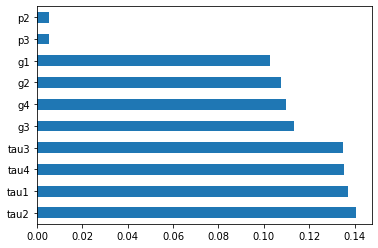

In [50]:
feature_importance = pd.Series(tuned_tree.feature_importances_, index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()